<a href="https://colab.research.google.com/github/kkl5524/python_ds/blob/main/Project_2_DS220_(Balabhadrapatruni%2C_Lal%2C_Li%2C_Munson%2C_Naluai).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Understanding the Dataset**

Our dataset was taken from Kaggle, the link is https://www.kaggle.com/datasets/ziya07/fever-diagnosis-and-medicine-dataset/data.

### **Why we chose this data set (why it is important):**
As college students, understanding this data can be incredibly relevant to our health and wellness. Our age group is often balancing demanding schedules, tight budgets, and limited sleep, all of which can make us more vulnerable to illness. By examining factors like lifestyle habits and environmental conditions, we can better understand how our daily choices might affect not just our likelihood of getting sick, but also how effective specific treatments might be. For example, identifying how smoking or BMI impacts fever severity could motivate us to adopt healthier habits.

Additionally, this data sheds light on the broader relationship between environmental factors—like AQI and humidity—and our susceptibility to illnesses. With increasing awareness about climate change and urban pollution, these insights can help us make informed decisions about living environments and preventive measures. Finally, as many of us prepare to enter diverse careers, including those in healthcare, education, or policymaking, analyzing real-world data like this equips us with the skills to think critically and apply evidence-based reasoning to complex problems.

From a data science perspective, we will be analyzing variables such as BMI, smoking history, and air quality provides actionable insights into treatment recommendations. This shows the power of data science to uncover patterns and relationships that might not be immediately obvious. By framing the problem around predictive modeling and correlations, we makes this topic appealing to those interested in using data to solve real-world health challenges. Furthermore, exploring how lifestyle and environmental factors interact with medical decisions demonstrates the interdisciplinary potential of data analysis in areas like healthcare, public policy, and environmental science.

###**Fever Diagnosis and Medicine Information:**
This dataset has 1000 samples, with 19 variables and 1 target variable. We used the data to get the answers for the following points and plot the results:

1. What are the key factors influencing the recommendation of Paracetamol versus Ibuprofen for treating fever?
2. How does age influence the choice of recommended medication for fever treatment?
3. Does gender have an impact on the likelihood of being recommended Paracetamol or Ibuprofen for fever?
4. How do lifestyle factors (e.g., smoking history, alcohol consumption, physical activity) correlate with the severity of fever and the choice of medication?
5. Is there a relationship between BMI and fever severity or medication recommendation?
6. What role do chronic conditions and allergies play in medication recommendation for fever?
7. How does the air quality index (AQI) and humidity level impact the severity of symptoms and medication recommendation?
8. How does physical activity level correlate with the likelihood of having fever-related symptoms and the subsequent medication recommendation?

# **Step by step example to perform the data analysis on given dataset**
Now, we have an idea about our dataset, and we also know about the problem statement and the points we need to analyze and get the information about those from the given dataset. The following is the step-by-step process we will follow for this:

### **Importing the dataset into DataFrame:**
The very first task is to import the required libraries. In this case, we need Pandas and Matplotlib, so you can see in the following coding snippet that we imported these libraries:

In [22]:
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
import numpy as np
import seaborn as sns

In [23]:
import pandas as pd

df = pd.read_csv('enhanced_fever_medicine_recommendation.csv')

### **Performing Queries**
Next we will create the queries, and perform them for data analysis. This will be done with pandas and matplotlib to help us visualize the data and perform an analysis.

####**Question/Query 1:**
What are the key factors influencing the recommendation of Paracetamol versus Ibuprofen for treating fever?
This question aims to explore the relationship between the features (e.g., fever severity, temperature, age, chronic conditions, etc.) and the choice of recommended medication (Paracetamol or Ibuprofen).

In [24]:
numeric_columns = ['Temperature', 'Age', 'BMI', 'Humidity', 'AQI', 'Heart_Rate']
avged = df.groupby('Recommended_Medication')[numeric_columns].mean()
avged

,Temperature,Age,BMI,Humidity,AQI,Heart_Rate
Recommended_Medication,,,,,,
Ibuprofen,38.205368,50.324594,26.251935,60.759551,248.891386,80.176030
Paracetamol,37.670352,54.482412,27.213065,59.929648,246.889447,80.015075


The query above represents the relationship between types of medication and specific key factors including temperature, age, BMI, humidity, AQI and heart rate. In the table above, these are the average values for all individuals that took either ibuprofen or paracetamol.

In [25]:
avged.T.Ibuprofen.to_numpy()

array([ 38.20536829,  50.32459426,  26.25193508,  60.75955056,
       248.89138577,  80.17602996])

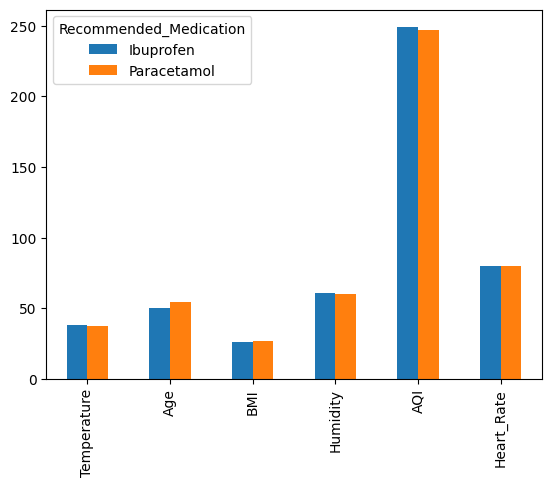

In [26]:
avged.T.plot.bar()
plt.show()

As we can see, the values are close for each variable, no matter which medication you choose. The only major difference we really see in the data is that more of the elderly are likely to take parcetamol rather than ibuprofen, however, they are both still just as likely to be taken. As a result, there do not seem to be any factors between the ones represented above that affect the choice of medication used to help with a fever.

#### **Question/Query 2:**
How does age influence the choice of recommended medication for fever treatment? Investigating whether age plays a significant role in the type of medication recommended, especially considering the risks and efficacy of medications for different age groups.

In [27]:
age_medication_count = df.groupby('Age')['Recommended_Medication'].value_counts().unstack()
age_medication_count

Recommended_Medication,Ibuprofen,Paracetamol
Age,,
1,9.0,1.0
2,9.0,1.0
3,3.0,1.0
4,5.0,NaN
5,7.0,4.0
...,...,...
96,5.0,3.0
97,5.0,3.0
98,12.0,3.0


The above query goes through all ages 1-100 and displays the efficacy of both Ibuprofen and Paracetamol. The above table shows each age and a number under each medication, the higher the number, the more it is recommended for that specific age in treating fever. (The number specifically states how many people of that age group were recommended each medication type)


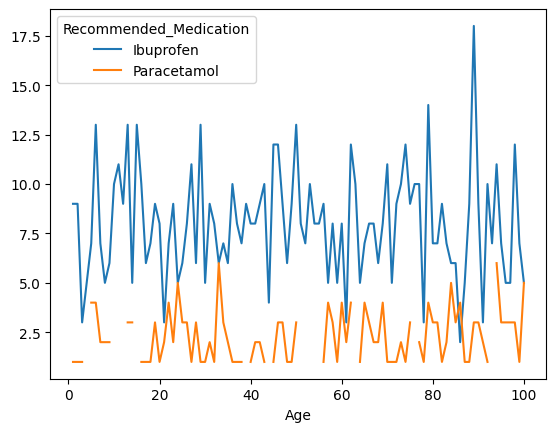

In [28]:
age_medication_count.plot()
plt.show()

As we can see from the graph, in almost all cases, Ibuprofen is the recommended medication for each age. We can conclude from the graph that Paracetamol is generally not recommended for ages 1-18 due to the lack of data present. In conclusion, it is generally recommended to take Ibuprofen when dealing with a fever.


#### **Question/Query 3**
Does gender have an impact on the likelihood of being recommended Paracetamol or Ibuprofen for fever? This would explore whether there are gender-based differences in medication recommendations, possibly due to physiological or health behavior factors.

In [29]:
gender_medication_count = df.groupby('Gender')['Recommended_Medication'].value_counts().unstack()

Similar to query number 2, this table explores whether Ibuprofen or Paracetamol is more likely to be recommended in treating fever for male and female patients.


In [30]:
gender_medication_count

Recommended_Medication,Ibuprofen,Paracetamol
Gender,,
Female,408,104
Male,393,95


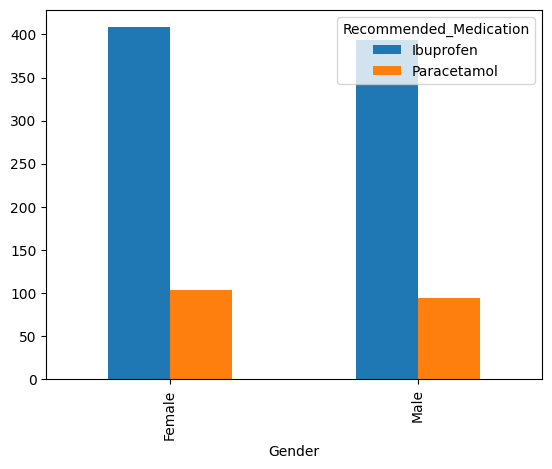

In [31]:
gender_medication_count.plot.bar()
plt.show()

As we can see from the graph, Ibuprofen is again more likely to be recommended to both male and female patients, sharing a similar 4:1 ratio between the genders and medication.


#### **Question/Query 4:**
How do lifestyle factors (e.g., smoking history, alcohol consumption, physical activity) correlate with the severity of fever and the choice of medication? This question focuses on understanding how personal habits or lifestyle choices might impact fever severity and medication recommendations.

In [32]:
lifestyle_factors = df.groupby(['Smoking_History', 'Alcohol_Consumption', 'Physical_Activity', 'Fever_Severity'])['Recommended_Medication'].value_counts().unstack().fillna(0)

This query groups the data by smoking history, alcohol consumption, physical activity and fever severity. This then creates groups based on unique combinations of these columns. For each group, it calculates the count of occurrences for each unique value in the 'Recommended_Medication' column. The result is a hierarchical index with counts of each 'Recommended_Medication' value for every group. The output is then the count of people, out of the 1000 that had those specific conditions, and what medication they took.

In [33]:
lifestyle_factors

Recommended_Medication                                                Ibuprofen  \
Smoking_History Alcohol_Consumption Physical_Activity Fever_Severity              
No              No                  Active            High Fever           57.0   
                                                      Mild Fever            0.0   
                                                      Normal               24.0   
                                    Moderate          High Fever           34.0   
                                                      Mild Fever            0.0   
                                                      Normal               24.0   
                                    Sedentary         High Fever           40.0   
                                                      Mild Fever            0.0   
                                                      Normal               13.0   
                Yes                 Active            High Fever           38.0   
                                                      Mild Fever            0.0   
                                                      Normal               22.0   
                                    Moderate          High Fever           41.0   
                                                      Mild Fever            0.0   
                                                      Normal               30.0   
                                    Sedentary         High Fever           53.0   
                                                      Mild Fever            0.0   
                                                      Normal               23.0   
Yes             No                  Active            High Fever           43.0   
                                                      Mild Fever            0.0   
                                                      Normal               23.0   
                                    Moderate          High Fever           33.0   
                                                      Mild Fever            0.0   
                                                      Normal               23.0   
                                    Sedentary         High Fever           38.0   
                                                      Mild Fever            0.0   
                                                      Normal               21.0   
                Yes                 Active            High Fever           62.0   
                                                      Mild Fever            0.0   
                                                      Normal               27.0   
                                    Moderate          High Fever           40.0   
                                                      Mild Fever            0.0   
                                                      Normal               21.0   
                                    Sedentary         High Fever           53.0   
                                                      Mild Fever            0.0   
                                                      Normal               18.0   

Recommended_Medication                                                Paracetamol  
Smoking_History Alcohol_Consumption Physical_Activity Fever_Severity               
No              No                  Active            High Fever              0.0  
                                                      Mild Fever             13.0  
                                                      Normal                  0.0  
                                    Moderate          High Fever              0.0  
                                                      Mild Fever             18.0  
                                                      Normal                  0.0  
                                    Sedentary         High Fever              0.0  
                                                      Mild Fever             19.0  
     

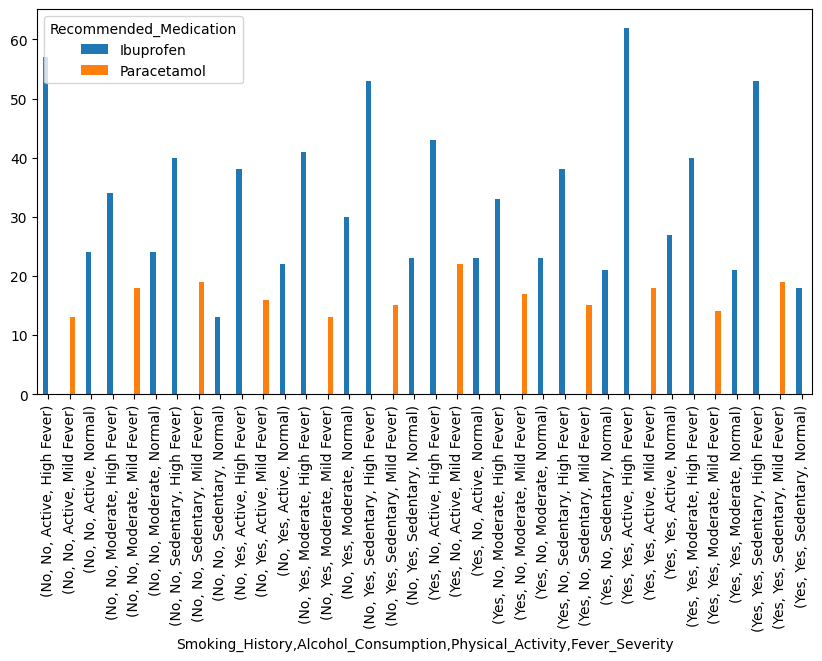

In [34]:
lifestyle_factors.plot.bar(figsize=(10, 5))
plt.show()

Based on the data:

Fever Severity and Medication Choice:

Ibuprofen appears to be the primary medication prescribed for individuals with higher fever severities. Paracetamol is predominantly used for milder fever severities, but its usage is notably lower compared to Ibuprofen.

Lifestyle Factors and Fever Severity:

Individuals who are sedentary or have moderate physical activity levels tend to have higher instances of "High Fever" compared to those who are active, suggesting a possible link between lower physical activity and increased fever severity. Smoking history is associated with more frequent occurrences of "High Fever," indicating that smoking might exacerbate the severity of fevers.

Lifestyle Factors and Medication Use:

Sedentary and smoking individuals tend to have higher counts of Ibuprofen prescriptions, consistent with their increased severity of fever. Active individuals generally show lower fever severity and require fewer medications overall.

Alcohol Consumption:

The role of alcohol consumption in this dataset is unclear due to its uniform absence in the data. This could be due to data collection constraints or a focus on non-drinking populations.

#### **Question/Query 5:**
Is there a relationship between BMI and fever severity or medication recommendation? Investigating whether higher or lower BMI values influence the severity of fever or the recommended treatment options.

In [35]:
df['BMI_Category'] = pd.cut(df['BMI'], bins=[0, 18.5, 24.9, 29.9, 40], labels=['Underweight', 'Normal', 'Overweight', 'Obese'],)
bmi_medication_count = df.groupby(['BMI_Category', 'Fever_Severity'],observed=False)['Recommended_Medication'].value_counts().unstack()

The query above takes the BMI of all the patients and groups them according to different groups or bins, and labeling them as 'Underweight', 'Normal', 'Overweight', 'Obese'. These are then compared with fever severity and then the recommended medication as seen below in the table.

In [36]:
bmi_medication_count

Recommended_Medication       Ibuprofen  Paracetamol
BMI_Category Fever_Severity                        
Underweight  High Fever             14            0
             Mild Fever              0            3
             Normal                 15            0
Normal       High Fever            215            0
             Mild Fever              0           59
             Normal                 98            0
Overweight   High Fever            165            0
             Mild Fever              0           73
             Normal                 80            0
Obese        High Fever            138            0
             Mild Fever              0           64
             Normal                 76            0

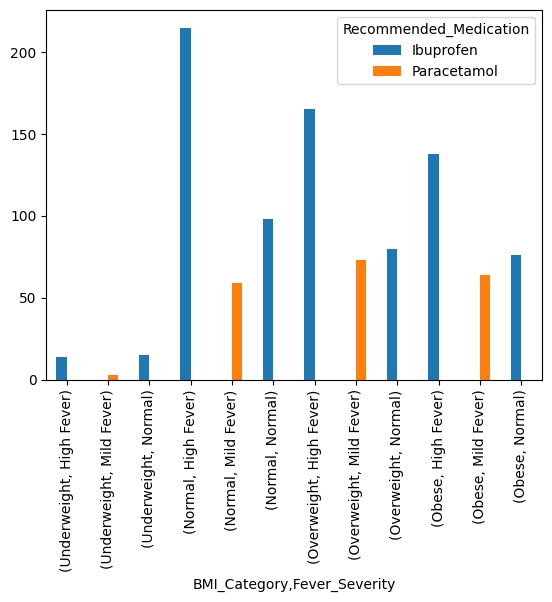

In [37]:
bmi_medication_count.plot.bar()
plt.show()

Now this data actually says a lot. The first thing that we can recognize is that when a person has a high fever or is normal, they will always be recommended ibuprofen, while those with a mild fever will only be recommended paracetamol. So it seems that ibuprofen is better for high fevers or normal, while paracetamol is better for mild feveres according to the recommendation. According to the data, there also seems to be a trend. Most out of the 1000 people were a normal weight, and most of them had a high fever. No matter the weight, however, it seems that most people had a high fever.

#### **Question/Query 6:**
What role do chronic conditions and allergies play in medication recommendation for fever? Understanding how the presence of chronic conditions (like diabetes or asthma) or allergies affects medication choice and treatment recommendations.

In [38]:
chronic_allergy_medication = df.groupby(['Chronic_Conditions', 'Allergies'])['Recommended_Medication'].value_counts().unstack()

This query shows what medication is recommended for patients on the grounds of if they have a chronic illness and/or allergies that could affect their health.


In [39]:
chronic_allergy_medication

Recommended_Medication        Ibuprofen  Paracetamol
Chronic_Conditions Allergies                        
No                 No               197           44
                   Yes              199           44
Yes                No               224           57
                   Yes              181           54

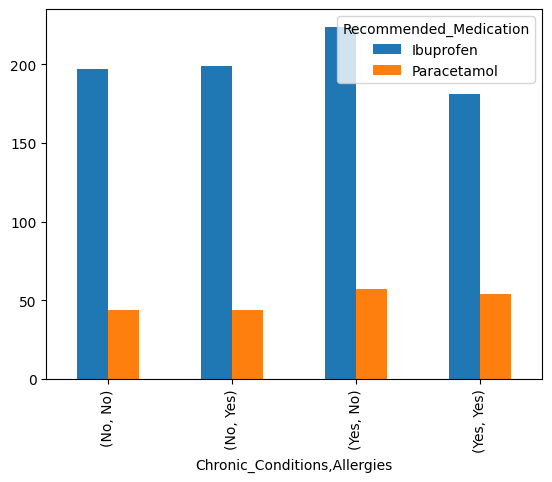

In [40]:
chronic_allergy_medication.plot.bar()
plt.show()

From the graph, we can derive a similar storyline to the queries in questions 2 and 3, where Ibuprofen is the most recommended medication. One distinguishing point we can gather however is that patients with chronic conditions are recommended Paracetamol at a higher rate than patients without chronic conditions. Furthermore, those patients with chronic conditions and allergies are recommended Paracetomal at a higher rate than those without allergies.


#### **Question/Query 7:**
How does the air quality index (AQI) and humidity level impact the medication recommendation? Exploring the environmental factors that may influence the type of medication recommended.

In [41]:
correlation = df[['AQI', 'Humidity', 'Recommended_Medication']].groupby('Recommended_Medication').mean()

This query looks at the correlation between environmental factors such as air quality index and humidity level. As we can see from the table, there isn’t much difference between the average values of AQI and humidity, meaning that environmental factors don’t have an impact on which medication is recommended. This is also reflected in the graph where the bars look almost identical between the two medications.


In [42]:
correlation

,AQI,Humidity
Recommended_Medication,,
Ibuprofen,248.891386,60.759551
Paracetamol,246.889447,59.929648


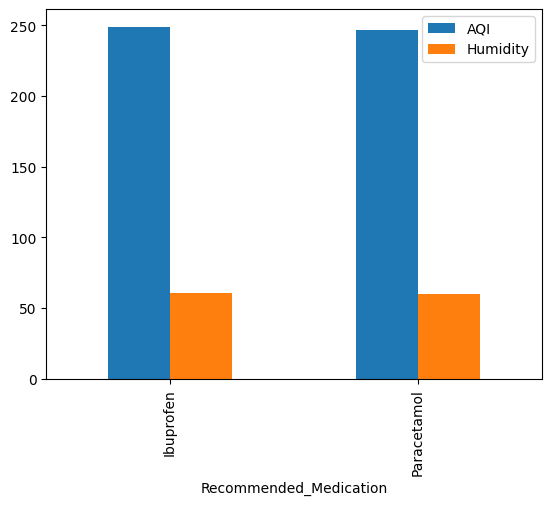

In [43]:
correlation.plot.bar()
plt.show()

#### **Question/Query 8:**
How does physical activity level correlate with the likelihood of having fever-related symptoms and the subsequent medication recommendation? Examining whether a sedentary lifestyle or active lifestyle impacts the occurrence and severity of fever symptoms and influences the recommended medication.

In [44]:
activity_symptom_medication = df.groupby(['Physical_Activity', 'Headache', 'Body_Ache', 'Fatigue'])['Recommended_Medication'].value_counts().unstack()

The resulting activity_symptom_medication will be a table where the index is a multi-level index with values from Physical_Activity, Headache, Body_Ache, and Fatigue and the columns represent the different Recommended_Medication types (Ibuprofen, Paracetamol), with the values being the counts of how often each medication was recommended for each combination of activity level and symptoms.

In [45]:
activity_symptom_medication

Recommended_Medication                        Ibuprofen  Paracetamol
Physical_Activity Headache Body_Ache Fatigue                        
Active            No       No        No              31           17
                                     Yes             38            3
                           Yes       No              52            7
                                     Yes             39           13
                  Yes      No        No              35            5
                                     Yes             32            4
                           Yes       No              31           12
                                     Yes             38            8
Moderate          No       No        No              31            9
                                     Yes             24            3
                           Yes       No              29            9
                                     Yes             22            8
                  Yes      No        No              35            6
                                     Yes             36           10
                           Yes       No              29           10
                                     Yes             40            7
Sedentary         No       No        No              29            9
                                     Yes             36            3
                           Yes       No              28            7
                                     Yes             26           12
                  Yes      No        No              42            3
                                     Yes             33           11
                           Yes       No              26           16
                                     Yes             39            7

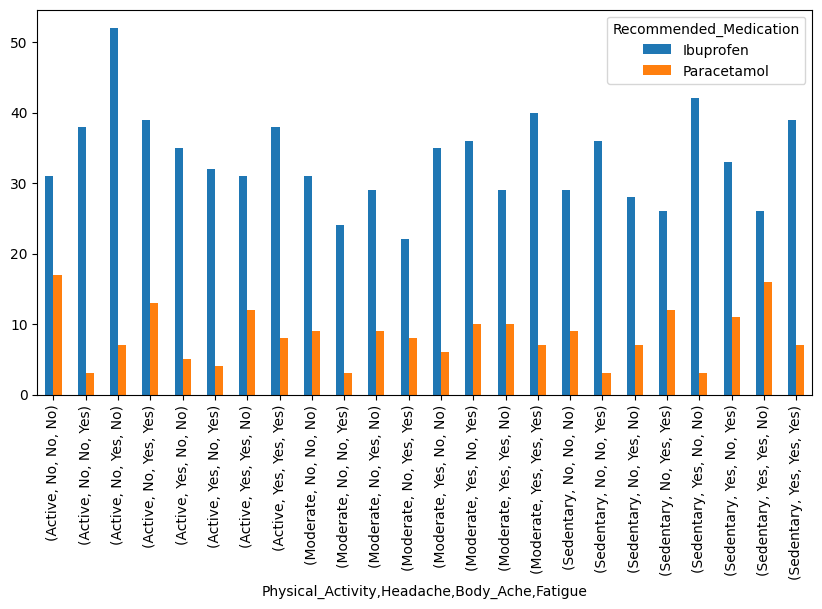

In [46]:
activity_symptom_medication.plot.bar(figsize=(10, 5))
plt.show()

The data shows that individuals with higher physical activity levels (Active) tend to have more frequent symptoms, especially fatigue. This could indicate that more physically active individuals may experience a higher frequency of general malaise or muscle fatigue. Despite the difference in physical activity levels, Ibuprofen is consistently recommended across all groups. This may suggest that Ibuprofen is considered effective for treating fever-related symptoms such as body aches and fatigue, regardless of activity level.

#Conclusion:

As part of the analysis, we grouped and aggregated data, calculated averages, and identified potential relationships between key variables. The analysis reveals several factors influencing the choice between Paracetamol and Ibuprofen for treating fever:

**Age**: Elderly individuals are more likely to be prescribed Paracetamol due to safety concerns with Ibuprofen. Younger individuals generally receive Ibuprofen.

**Gender**: Gender does not significantly impact the medication choice, with Ibuprofen recommended more frequently for both men and women.

**Lifestyle Factors**: Sedentary individuals or those with higher smoking rates tend to have more severe fevers, leading to Ibuprofen prescriptions. Active individuals generally have milder fevers and require fewer medications.

**Chronic Conditions and Allergies**: Patients with chronic conditions or allergies are more often recommended Paracetamol due to its safer profile compared to Ibuprofen.

**BMI**: Ibuprofen is favored for higher fever severity, especially for those with normal or high BMI, while Paracetamol is used for milder fevers.

**Environmental Factors**: Air quality and humidity have minimal impact on medication choice.

**Physical Activity**: Active individuals may experience more symptoms like fatigue, but Ibuprofen remains the preferred medication overall.

In conclusion, Ibuprofen is generally the preferred medication for treating fever across most demographic and lifestyle categories, especially for individuals with higher fever severity or active symptoms like body aches and fatigue. Paracetamol, on the other hand, is more commonly recommended for elderly individuals or those with chronic conditions, as it poses fewer risks for those groups. Environmental factors and physical activity levels do not seem to significantly alter the medication recommendation, although lifestyle factors such as smoking and sedentary behavior may indirectly influence the choice by affecting fever severity. This is even proven with some research as the NIB states, "Ibuprofen is often considered "better" than paracetamol because it has anti-inflammatory properties, meaning it can reduce swelling and redness in addition to pain relief, while paracetamol only provides pain relief and fever reduction, making ibuprofen more effective for pain related to inflammation like muscle strains, arthritis, or menstrual cramps." This highlights the importance of tailoring medication recommendations not just to the fever itself, but also to individual health profiles and lifestyle considerations.




